[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

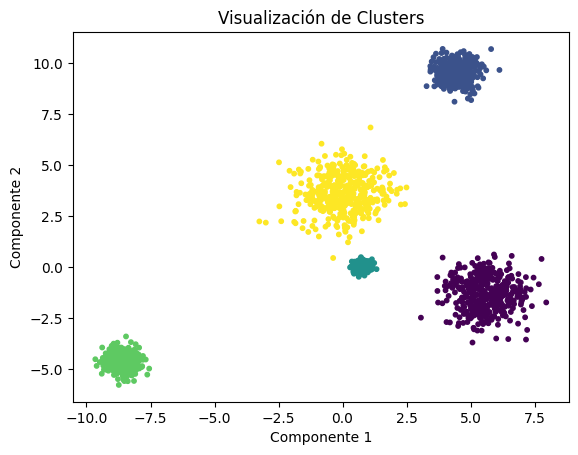

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Establecer la semilla para la reproducibilidad
np.random.seed(7)

# Definir la cantidad de centroides aleatoriamente entre 1 y 10
n_centroides = np.random.randint(1, 11)

# Crear los centroides asegurando una mayor distancia entre ellos
blob_centers = np.random.uniform(low=-10, high=10, size=(n_centroides, 2))

# Definir desviaciones estándar para cada centroide (también aleatorias)
blob_std = np.random.uniform(0.1, 1.0, size=n_centroides)

# Generar los datos con los centroides y las desviaciones estándar ajustadas
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

# Visualización para verificar la separación de los clusters
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.title("Visualización de Clusters")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

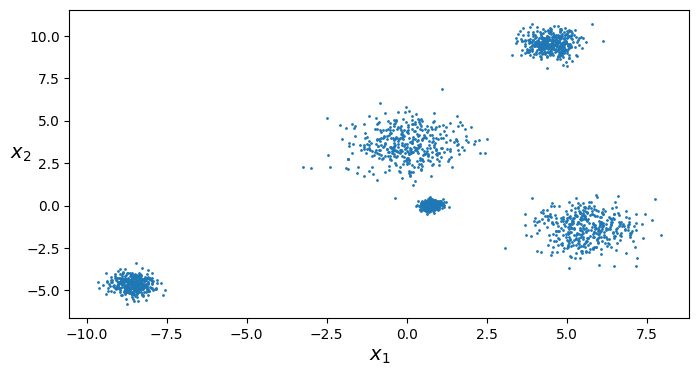

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([4, 3, 0, ..., 1, 0, 3], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 5.59863435e+00, -1.32522325e+00],
       [-8.56233618e+00, -4.63780225e+00],
       [ 4.49447529e+00,  9.54407045e+00],
       [ 7.43856643e-01,  5.09283404e-02],
       [-4.54383451e-03,  3.64110997e+00]])

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

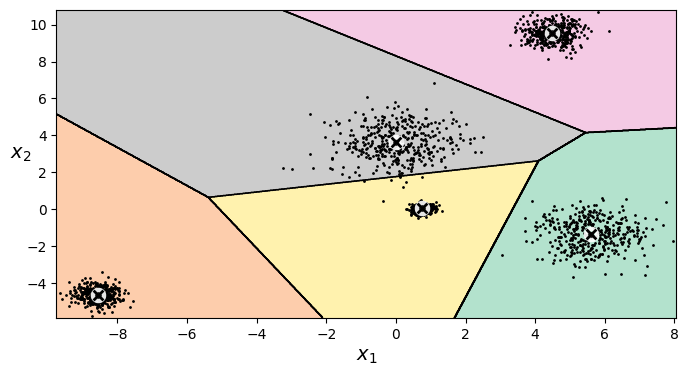

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

# Verificar la forma de los datos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (1500, 2)
Tamaño de X_test: (500, 2)
Tamaño de y_train: (1500,)
Tamaño de y_test: (500,)


En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística con los mismos parámetros
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Ajustar el modelo a los datos de entrenamiento generados con make_blobs
%time log_reg2.fit(X_train, y_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy_test = log_reg2.score(X_test, y_test)
# Evaluar el rendimiento del modelo en el conjunto de entrenamiento
accuracy_train = log_reg2.score(X_train, y_train)
print(f"Precisión del modelo en los datos de entrenamiento: {accuracy_train}")
print(f"Precisión del modelo en los datos de prueba: {accuracy_test}")


CPU times: user 28.2 ms, sys: 2.01 ms, total: 30.3 ms
Wall time: 32.1 ms
Precisión del modelo en los datos de entrenamiento: 0.9893333333333333
Precisión del modelo en los datos de prueba: 0.986


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

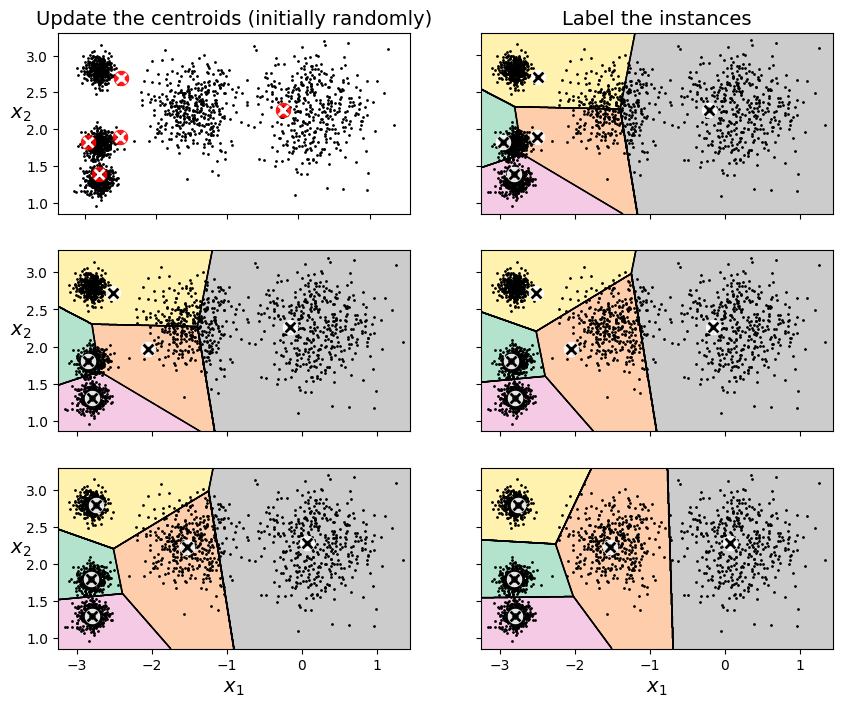

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


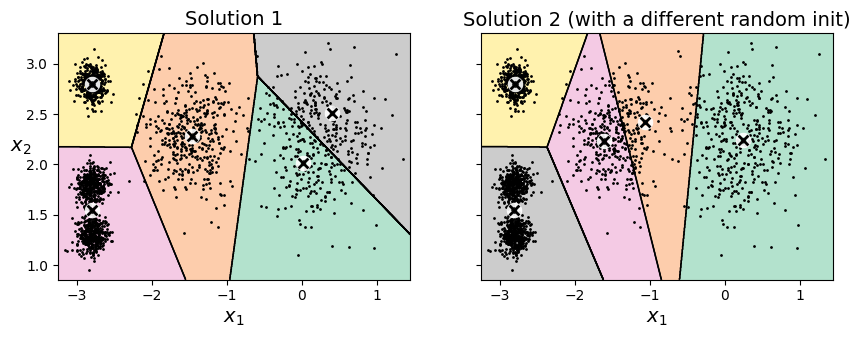

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=5, n_init=10,
       random_state=11)

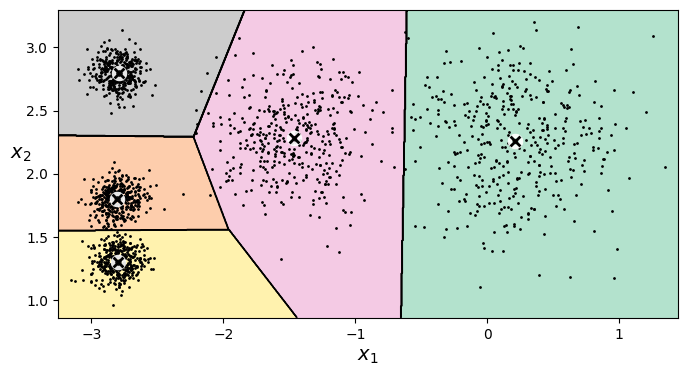

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans).

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

In [ ]:
best_kmeans.score(X)

-211.71203428611048

El algoritmo de *mini-batch K-Means* es más rápido que *K-Means* normal, pero su precisión suele ser peor.

### Encontrando el número óptimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

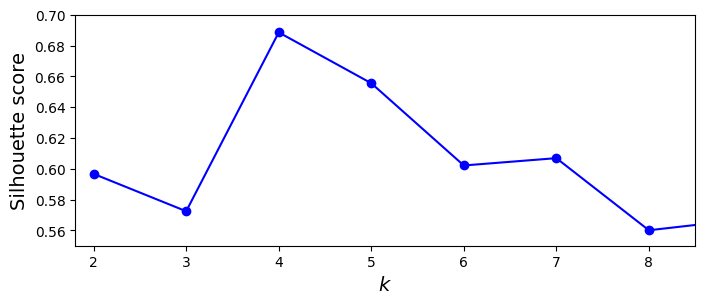

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

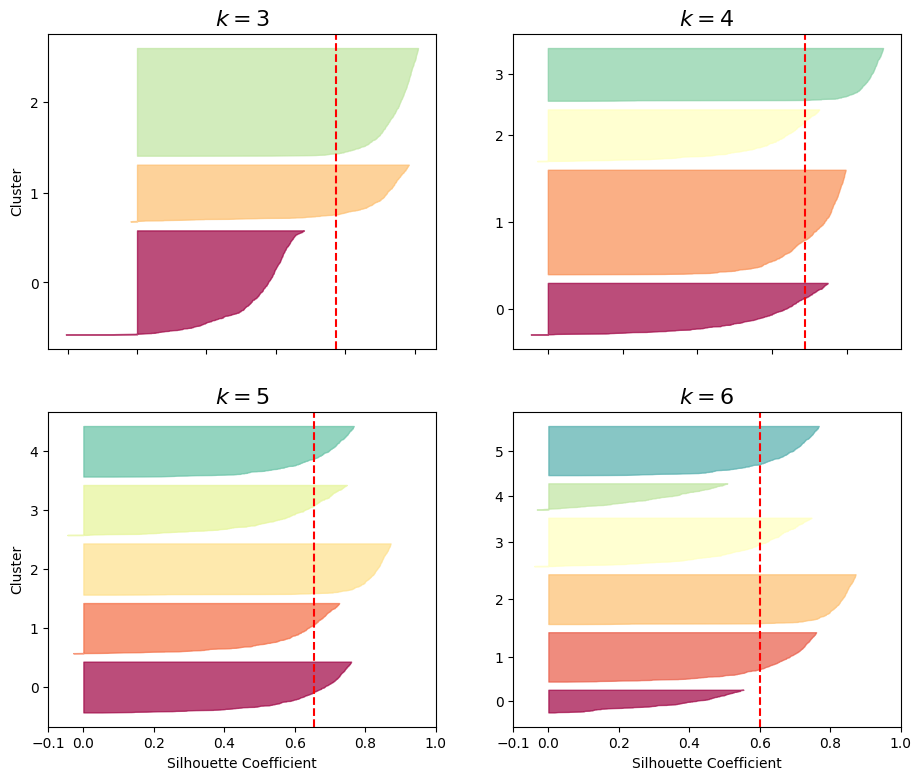

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

# K-Means para aprendizaje semi-supervisado.

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset MNIST y usando *K-Means*. Empezamos descargando el dataset.

# Descarga Dataset

In [ ]:
!pip install --upgrade kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.2
    Uninstalling kagglehub-0.3.2:
      Successfully uninstalled kagglehub-0.3.2


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/butterfly-images40-species")

print("Path to dataset files:", path)

100%|██████████| 399M/399M [00:09<00:00, 44.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gpiosenka/butterfly-images40-species/versions/13


In [ ]:
pip install pillow opencv-python scikit-learn torch torchvision

# Centraliza los datos y a medida que los pasa a la nueva carpeta centralizada recoge datos de su ruta original, nombre y nueva ruta y los almacena en un csv

In [ ]:
import os
import shutil
import csv

# Definir rutas
ruta_origen = '/root/.cache/kagglehub/datasets/gpiosenka/butterfly-images40-species/versions/13/test'
carpeta_destino = '/content/train_centralizado'  # Carpeta para guardar las imágenes procesadas
ruta_csv = '/content/info_imagenes.csv'  # Ruta para guardar el CSV
parte_ruta_a_reemplazar = '/root/.cache/kagglehub/datasets/gpiosenka/butterfly-images40-species/versions/13/test'
nueva_ruta = 'train'

# Crear la carpeta de destino si no existe
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Crear y abrir un archivo CSV para guardar la información
with open(ruta_csv, mode='w', newline='') as archivo_csv:
    writer = csv.writer(archivo_csv)
    # Escribir encabezados
    writer.writerow(['Nombre original', 'Subcarpeta origen', 'Nuevo nombre', 'Ruta nueva', 'Ruta original'])

    # Comprobar si hay imágenes en la ruta de origen
    archivos_en_origen = False  # Variable para verificar si hay archivos
    prefix_counter = 0
    for root, dirs, files in os.walk(ruta_origen):
        if files:
            archivos_en_origen = True
        for file in files:
            if file.endswith(".jpg"):
                print(f"Procesando: {file}")  # Mensaje de depuración
                archivos_en_origen = True  # Hay archivos para procesar
                ruta_original = os.path.join(root, file)
                subcarpeta_origen = os.path.basename(root)  # Nombre de la subcarpeta

                # Extraer el nombre del archivo sin la extensión
                nombre_base, extension = os.path.splitext(file)

                # Agregar ceros a la izquierda para que el nombre tenga 3 dígitos
                nombre_base_con_ceros = nombre_base.zfill(3)  # Asegurar que tenga 3 dígitos

                nuevo_nombre = f"{prefix_counter}_{nombre_base_con_ceros}{extension}"
                ruta_nueva = os.path.join(carpeta_destino, nuevo_nombre)

                # Evitar duplicados
                counter = 1
                while os.path.exists(ruta_nueva):
                    base, extension = os.path.splitext(nuevo_nombre)
                    ruta_nueva = os.path.join(carpeta_destino, f"{base}_{counter}{extension}")
                    counter += 1

                # Crear la ruta original formateada
                ruta_original_formateada = os.path.join(nueva_ruta, subcarpeta_origen, nombre_base_con_ceros + extension)

                # Mover archivo y guardar info en el CSV
                try:
                    shutil.move(ruta_original, ruta_nueva)
                    writer.writerow([file, subcarpeta_origen, nuevo_nombre, ruta_nueva, ruta_original_formateada])
                    print(f"Archivo movido a: {ruta_nueva}")  # Mensaje de éxito
                except Exception as e:
                    print(f"Error moviendo {ruta_original} a {ruta_nueva}: {e}")

                prefix_counter += 1

    if not archivos_en_origen:
        print("No se encontraron archivos .jpg en la ruta de origen.")

print(f"Información de las imágenes guardada en '{ruta_csv}'.")


Procesando: 3.jpg
Archivo movido a: /content/train_centralizado/0_003.jpg
Procesando: 2.jpg
Archivo movido a: /content/train_centralizado/1_002.jpg
Procesando: 5.jpg
Archivo movido a: /content/train_centralizado/2_005.jpg
Procesando: 4.jpg
Archivo movido a: /content/train_centralizado/3_004.jpg
Procesando: 1.jpg
Archivo movido a: /content/train_centralizado/4_001.jpg
Procesando: 3.jpg
Archivo movido a: /content/train_centralizado/5_003.jpg
Procesando: 2.jpg
Archivo movido a: /content/train_centralizado/6_002.jpg
Procesando: 5.jpg
Archivo movido a: /content/train_centralizado/7_005.jpg
Procesando: 4.jpg
Archivo movido a: /content/train_centralizado/8_004.jpg
Procesando: 1.jpg
Archivo movido a: /content/train_centralizado/9_001.jpg
Procesando: 3.jpg
Archivo movido a: /content/train_centralizado/10_003.jpg
Procesando: 2.jpg
Archivo movido a: /content/train_centralizado/11_002.jpg
Procesando: 5.jpg
Archivo movido a: /content/train_centralizado/12_005.jpg
Procesando: 4.jpg
Archivo movido a:

# Verificación de los datos del anterior csv

In [ ]:
import pandas as pd

# Cargar el dataset generado desde el archivo CSV
dataset_path = "info_imagenes.csv"
df = pd.read_csv(dataset_path)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Mostrar la cantidad de filas y columnas
num_filas, num_columnas = df.shape
print(f"\nCantidad de filas: {num_filas}")
print(f"Cantidad de columnas: {num_columnas}")

# Mostrar información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Mostrar estadísticas descriptivas del DataFrame (opcional)
print("\nEstadísticas descriptivas:")
print(df.describe())


  Nombre original    Subcarpeta origen Nuevo nombre  \
0           3.jpg  SIXSPOT BURNET MOTH    0_003.jpg   
1           2.jpg  SIXSPOT BURNET MOTH    1_002.jpg   
2           5.jpg  SIXSPOT BURNET MOTH    2_005.jpg   
3           4.jpg  SIXSPOT BURNET MOTH    3_004.jpg   
4           1.jpg  SIXSPOT BURNET MOTH    4_001.jpg   

                              Ruta nueva                      Ruta original  
0  /content/train_centralizado/0_003.jpg  train/SIXSPOT BURNET MOTH/003.jpg  
1  /content/train_centralizado/1_002.jpg  train/SIXSPOT BURNET MOTH/002.jpg  
2  /content/train_centralizado/2_005.jpg  train/SIXSPOT BURNET MOTH/005.jpg  
3  /content/train_centralizado/3_004.jpg  train/SIXSPOT BURNET MOTH/004.jpg  
4  /content/train_centralizado/4_001.jpg  train/SIXSPOT BURNET MOTH/001.jpg  

Cantidad de filas: 500
Cantidad de columnas: 5

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          

# Rutas + Labels - recoje los datos de rutas del anterior csv y labels del dataset y los une nuevamente en un nuevo csv

In [ ]:
import pandas as pd

# Rutas de los CSVs
csv_rutas = '/content/info_imagenes.csv'  # CSV que tiene las antiguas y nuevas rutas
csv_labels = '/root/.cache/kagglehub/datasets/gpiosenka/butterfly-images40-species/versions/13/butterflies and moths.csv'  # CSV que tiene las antiguas rutas y las labels
csv_salida = 'nuevas_rutas_con_labels.csv'  # Nombre del nuevo archivo CSV de salida

# Cargar los CSVs en DataFrames
df_rutas = pd.read_csv(csv_rutas)
df_labels = pd.read_csv(csv_labels)

# Asegúrate de que ambos DataFrames tengan una columna con la misma clave, en este caso las rutas antiguas
df_rutas.rename(columns={'Ruta original': 'filepaths'}, inplace=True)  # Renombra columna si es necesario
df_labels.rename(columns={'filepaths': 'filepaths'}, inplace=True)  # Renombra columna si es necesario

# Combinar los DataFrames utilizando la columna de las rutas antiguas como clave
df_combined = pd.merge(df_rutas, df_labels, on='filepaths', how='inner')

# Verificar cuántas coincidencias se encontraron
coincidencias = df_combined.shape[0]
print(f"Se encontraron {coincidencias} coincidencias al combinar los DataFrames.")

# Mostrar las primeras filas para verificar el contenido
print("Primeras filas del DataFrame combinado:")
print(df_combined.head())

# Mostrar cuántas filas de df_rutas no encontraron coincidencia en df_labels
df_sin_coincidencia = pd.merge(df_rutas, df_labels, on='filepaths', how='left', indicator=True)
no_coincidencias = df_sin_coincidencia[df_sin_coincidencia['_merge'] == 'left_only'].shape[0]
print(f"Se encontraron {no_coincidencias} filas sin coincidencia en el DataFrame de etiquetas.")

# Mantener solo las columnas de interés (nuevas rutas y labels)
df_final = df_combined[['Ruta nueva', 'labels']]  # 'Ruta nueva' es la nueva ruta, y 'labels' la etiqueta

# Guardar el nuevo DataFrame en un archivo CSV
df_final.to_csv(csv_salida, index=False)

print(f"CSV generado correctamente: {csv_salida}")


Se encontraron 500 coincidencias al combinar los DataFrames.
Primeras filas del DataFrame combinado:
  Nombre original    Subcarpeta origen Nuevo nombre  \
0           3.jpg  SIXSPOT BURNET MOTH    0_003.jpg   
1           2.jpg  SIXSPOT BURNET MOTH    1_002.jpg   
2           5.jpg  SIXSPOT BURNET MOTH    2_005.jpg   
3           4.jpg  SIXSPOT BURNET MOTH    3_004.jpg   
4           1.jpg  SIXSPOT BURNET MOTH    4_001.jpg   

                              Ruta nueva                          filepaths  \
0  /content/train_centralizado/0_003.jpg  train/SIXSPOT BURNET MOTH/003.jpg   
1  /content/train_centralizado/1_002.jpg  train/SIXSPOT BURNET MOTH/002.jpg   
2  /content/train_centralizado/2_005.jpg  train/SIXSPOT BURNET MOTH/005.jpg   
3  /content/train_centralizado/3_004.jpg  train/SIXSPOT BURNET MOTH/004.jpg   
4  /content/train_centralizado/4_001.jpg  train/SIXSPOT BURNET MOTH/001.jpg   

   class id               labels data set  
0        87  SIXSPOT BURNET MOTH    train  
1    

# Verificación

In [ ]:
import pandas as pd

# Cargar el dataset generado desde el archivo CSV
dataset_path = "nuevas_rutas_con_labels.csv"
df = pd.read_csv(dataset_path)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Mostrar la cantidad de filas y columnas
num_filas, num_columnas = df.shape
print(f"\nCantidad de filas: {num_filas}")
print(f"Cantidad de columnas: {num_columnas}")

# Mostrar información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Mostrar estadísticas descriptivas del DataFrame (opcional)
print("\nEstadísticas descriptivas:")
print(df.describe())


                              Ruta nueva  labels
0  /content/train_centralizado/0_003.jpg       0
1  /content/train_centralizado/1_002.jpg       0
2  /content/train_centralizado/2_005.jpg       0
3  /content/train_centralizado/3_004.jpg       0
4  /content/train_centralizado/4_001.jpg       0

Cantidad de filas: 500
Cantidad de columnas: 2

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ruta nueva  500 non-null    object
 1   labels      500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB
None

Estadísticas descriptivas:
           labels
count  500.000000
mean    49.500000
std     28.894979
min      0.000000
25%     24.750000
50%     49.500000
75%     74.250000
max     99.000000


# Vuelve las labes del anterior csv a numericas y las actualiza en el mismo archivo, para luego imprimir un diccionario de las labels

In [ ]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
csv_salida = 'nuevas_rutas_con_labels.csv'  # Archivo CSV generado anteriormente
df = pd.read_csv(csv_salida)

# Convertir la columna 'labels' a valores numéricos
df['labels'], unique_labels = pd.factorize(df['labels'])

# Crear un diccionario para asociar cada etiqueta única con su índice
diccionario_labels = {label: index for index, label in enumerate(unique_labels)}

# Imprimir el diccionario en el formato deseado
print("Diccionario de nombres originales y sus números correspondientes:")
for label, numero in diccionario_labels.items():
    print(f"{label}: {numero}")

# Si deseas también guardar el DataFrame actualizado
df.to_csv(csv_salida, index=False)

# Confirmar que el CSV se actualizó
print(f"CSV actualizado guardado como: {csv_salida}")


Diccionario de nombres originales y sus números correspondientes:
SIXSPOT BURNET MOTH: 0
CLEOPATRA: 1
PIPEVINE SWALLOW: 2
PINE WHITE: 3
AMERICAN SNOOT: 4
COMMON WOOD-NYMPH: 5
STRAITED QUEEN: 6
CABBAGE WHITE: 7
CLEARWING MOTH: 8
SCARCE SWALLOW: 9
POPINJAY: 10
ROSY MAPLE MOTH: 11
OLEANDER HAWK MOTH: 12
ORANGE TIP: 13
COMET MOTH: 14
PEACOCK: 15
SOOTYWING: 16
DANAID EGGFLY: 17
GOLD BANDED: 18
RED CRACKER: 19
EMPEROR GUM MOTH: 20
PAPER KITE: 21
ORCHARD SWALLOW: 22
SOUTHERN DOGFACE: 23
LUNA MOTH: 24
GREAT EGGFLY: 25
ORANGE OAKLEAF: 26
BANDED PEACOCK: 27
HERCULES MOTH: 28
CRECENT: 29
BROWN SIPROETA: 30
BANDED TIGER MOTH: 31
JULIA: 32
EASTERN PINE ELFIN: 33
BIRD CHERRY ERMINE MOTH: 34
TWO BARRED FLASHER: 35
CLOUDED SULPHUR: 36
PURPLISH COPPER: 37
ATLAS MOTH: 38
CRIMSON PATCH: 39
BLUE MORPHO: 40
ELBOWED PIERROT: 41
VICEROY: 42
CHALK HILL BLUE: 43
RED POSTMAN: 44
AFRICAN GIANT SWALLOWTAIL: 45
MANGROVE SKIPPER: 46
CLODIUS PARNASSIAN: 47
BECKERS WHITE: 48
LARGE MARBLE: 49
RED ADMIRAL: 50
GREAT JAY

# Datset como tal - Compara las rutas del csv anterior con las rutas delas imagens para volverlas numericas y añadir a las ultimas columnas nombre, ruta y label (nombre y ruta solo estan or si acaso, para l manual ,pero aqui no se usan)

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Definir rutas
ruta_labels = 'nuevas_rutas_con_labels.csv'  # Cambia esto por la ruta de tu archivo CSV
ruta_salida = 'datos_imagenes_procesados.csv'  # Nombre del archivo CSV de salida

# Función para convertir una imagen a un array de valores numéricos
def image_to_numeric(image_path):
    img = Image.open(image_path).convert('L')  # Convertir a escala de grises
    img_resized = img.resize((28, 28))         # Redimensionar la imagen a un tamaño fijo
    img_array = np.array(img_resized).flatten() # Convertir la imagen a un array 1D
    return img_array

# Leer el archivo CSV con rutas y etiquetas
labels_df = pd.read_csv(ruta_labels)

# Lista para almacenar los datos de las imágenes
data = []

# Recorrer el DataFrame para procesar cada imagen
for index, row in labels_df.iterrows():
    image_path = row['Ruta nueva']  # Cambia 'Ruta' por el nombre de la columna correspondiente en tu CSV
    label = row['labels']      # Cambia 'Label' por el nombre de la columna correspondiente en tu CSV
    name = os.path.basename(image_path)  # Extraer el nombre del archivo

    if os.path.exists(image_path):    # Verificar que la imagen exista
        img_data = image_to_numeric(image_path)  # Convertir la imagen a datos numéricos
        # Convertir img_data a lista antes de concatenar
        data.append(img_data.tolist() + [name, image_path, label])

# Crear un DataFrame a partir de los datos
columnas = [f'pixel_{i}' for i in range(28 * 28)] + ['Nombre', 'Ruta', 'Label']  # Cambia el tamaño según la imagen
df_final = pd.DataFrame(data, columns=columnas)

# Guardar el DataFrame en un archivo CSV
df_final.to_csv(ruta_salida, index=False)

print(f"CSV generado correctamente: {ruta_salida}")


CSV generado correctamente: datos_imagenes_procesados.csv


# Verificaion

In [ ]:
import pandas as pd

# Ruta del archivo CSV
ruta_csv = 'datos_imagenes_procesados.csv'  # Cambia esto por la ruta de tu archivo

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_csv)

# Mostrar las primeras filas del DataFrame
print(df.head())  # Muestra las primeras 5 filas

# Mostrar la cantidad de filas y columnas
num_filas, num_columnas = df.shape
print(f"\nCantidad de filas: {num_filas}")
print(f"Cantidad de columnas: {num_columnas}")

# Opcional: mostrar información sobre el DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Opcional: mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      128      134      129      110      100       97       90       94   
1       59       95      102       65       23       42       40       40   
2       67       70       92       91       76      102      104       80   
3      180      196      167      151      175      140      176      199   
4      127      211      206      218      209      223      250      250   

   pixel_8  pixel_9  ...  pixel_777  pixel_778  pixel_779  pixel_780  \
0       95       95  ...        211        227        205        191   
1       86      128  ...         27         24         66         90   
2       75       67  ...         74         42         37         64   
3      177      162  ...        160        148        182        172   
4      247      204  ...        139        150        134        133   

   pixel_781  pixel_782  pixel_783     Nombre  \
0        131        133        195  0_003.jpg   
1     

# Verificacion carpeta centralizada - Aquí me di cuenta que estabamos trabajando solo con 500 datos :(

In [ ]:
import os

# Especifica la carpeta de la que deseas listar los archivos
folder_path = '/content/train_centralizado'  # Cambia esto por la ruta de tu carpeta

# Listar los archivos en la carpeta
files = os.listdir(folder_path)

# Imprimir la cantidad de archivos encontrados
num_archivos = len(files)
print(f"Cantidad de archivos en la carpeta: {num_archivos}")

# Imprimir los archivos encontrados

print("Archivos en la carpeta:")
for file in files:
    print(file)


Cantidad de archivos en la carpeta: 500
Archivos en la carpeta:
379_001.jpg
47_005.jpg
487_005.jpg
164_001.jpg
246_002.jpg
431_002.jpg
426_002.jpg
493_004.jpg
224_001.jpg
466_002.jpg
268_004.jpg
395_003.jpg
411_002.jpg
264_001.jpg
370_003.jpg
11_002.jpg
217_005.jpg
73_004.jpg
181_002.jpg
178_004.jpg
111_002.jpg
227_005.jpg
348_004.jpg
452_005.jpg
97_005.jpg
499_001.jpg
449_001.jpg
261_002.jpg
249_001.jpg
319_001.jpg
121_002.jpg
191_002.jpg
207_005.jpg
423_004.jpg
4_001.jpg
237_005.jpg
324_001.jpg
173_004.jpg
425_003.jpg
134_001.jpg
485_003.jpg
447_005.jpg
98_004.jpg
417_005.jpg
78_004.jpg
87_005.jpg
199_001.jpg
156_002.jpg
130_003.jpg
182_005.jpg
314_001.jpg
464_001.jpg
223_004.jpg
245_003.jpg
328_004.jpg
18_004.jpg
442_005.jpg
418_004.jpg
294_001.jpg
152_005.jpg
322_005.jpg
89_001.jpg
196_002.jpg
304_001.jpg
273_004.jpg
125_003.jpg
412_005.jpg
287_005.jpg
409_001.jpg
231_002.jpg
467_005.jpg
482_005.jpg
415_003.jpg
90_003.jpg
20_003.jpg
286_002.jpg
179_001.jpg
7_005.jpg
495_003.jpg
382

# Dividir

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Función para cargar el dataset desde un CSV
def load_dataset(csv_file):
    data = pd.read_csv(csv_file)
    return data

# Ruta del archivo CSV
csv_file = 'datos_imagenes_procesados.csv'  # Cambia esto por la ruta a tu archivo CSV

# Cargar el dataset
data = load_dataset(csv_file)

# Definir X como las primeras 784 columnas y y como la columna 'Label'
X = data.iloc[:, :784]  # Tomar las primeras 784 columnas
y = data['Label']  # Cambia 'Label' por el nombre exacto de la columna de etiquetas

print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)

# Hacer Random
# Generar un índice aleatorio
indices = np.random.permutation(len(X))

# Reordenar X e y según el índice aleatorio
X_shuffled = X.iloc[indices].reset_index(drop=True)
y_shuffled = y.iloc[indices].reset_index(drop=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

# Verificar dimensiones
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

# Aquí puedes continuar con el entrenamiento del modelo
model = LogisticRegression(max_iter=1000)  # Aumenta max_iter si es necesario
model.fit(X_train, y_train)
"""
# Realizar predicciones
predictions = model.predict(X_test)

# Verificar algunas predicciones
print("Predicciones:", predictions)
"""

Tamaño de X: (500, 784)
Tamaño de y: (500,)
Tamaño de X_train: (400, 784)
Tamaño de X_test: (100, 784)
Tamaño de y_train: (400,)
Tamaño de y_test: (100,)
Predicciones: [ 9 54 14 89 46 31 67 89 53 47 81 20 17 32 68 60 94 70 47 48 63 43 80 98
  2 23  0 20 15 48  2 61 98 87 48 14 21 98 90 82 44 20 44 49 64 88 86 43
 15 98 31 39 34 22 52 92 82 54 16 82 75 60 67 90 63 76 15 63 32 73 77 45
 59 18 60 42 37 28 21 60 68 37 18  8 18 80 29 36 21  7 30 48 50 60  2 36
 88 31 43 60]


# Falsas Etiquetas

Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo $X$ y no $y$) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de *K-Means* con, por ejemplos, 50 grupos. De esta manera encontraremos aquellas imágenes más representativas de cada grupo.

In [ ]:
from sklearn.cluster import KMeans

k = 196
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [ ]:
import numpy as np

# Obtener los índices de los valores mínimos en X_digits_dist
idxs = np.argmin(X_digits_dist, axis=0)

# Seleccionar los representantes de X_train basados en esos índices
X_representative_digits = X_train.values[idxs]

# Imprimir la longitud o tamaño de X_representative_digits
print(f"Tamaño de X_representative_digits: {X_representative_digits.shape}")


Tamaño de X_representative_digits: (196, 784)


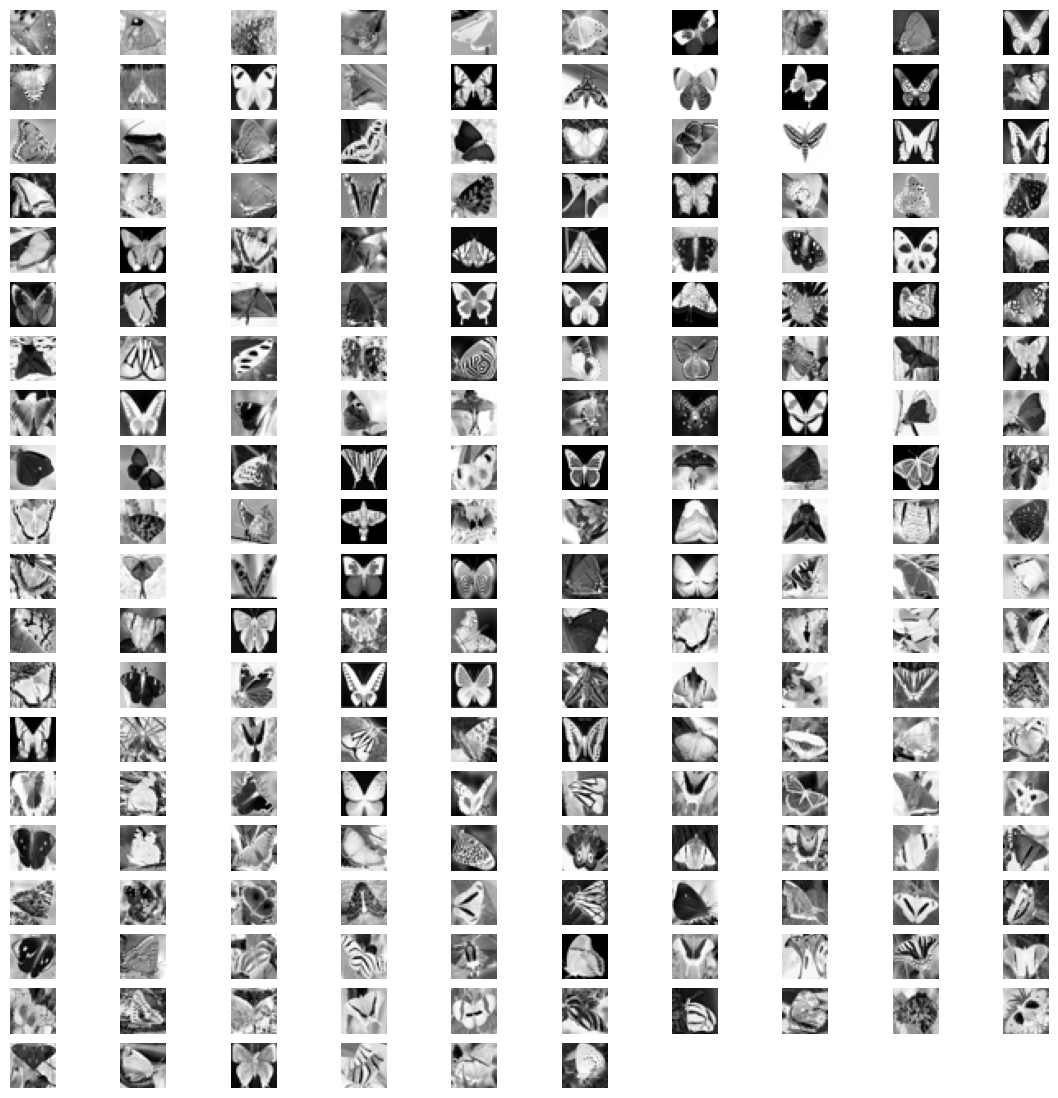

'\n# Imprimir los nombres de los archivos graficados\nfor index, file_name in enumerate(file_names[:len(X_representative_digits)]):\n    print(f"Imagen {index+1}: {file_name}")\n'

In [ ]:
import matplotlib.pyplot as plt
# Ajustar la cuadrícula para acomodar más imágenes
num_images = len(X_representative_digits)
rows = (num_images // 10) + 1  # Incrementar el número de filas

plt.figure(figsize=(14, 14))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(rows, 10, index+1)
    plt.imshow(X_representative_digit.reshape(28, 28), cmap="binary")
    plt.axis('off')

plt.show()

"""
# Imprimir los nombres de los archivos graficados
for index, file_name in enumerate(file_names[:len(X_representative_digits)]):
    print(f"Imagen {index+1}: {file_name}")
"""

El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos trampas ya que disponemos de dichas etiquetas :p).

In [ ]:
y_representative_digits = y_train.values[idxs]
print(f"Número de muestras en y_representative_digits: {y_representative_digits.shape[0]}")


Número de muestras en y_representative_digits: 196


Y entrenaremos un clasificados usando estas imágenes representativas.

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=100000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 1.97 s, sys: 1.19 s, total: 3.16 s
Wall time: 1.72 s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.04

Como puedes observar hemos obtenido una precisión de casi el $80%$ habiendo anotado simplemente 50 imágenes, pero aquellas más representativas. Entrenar el mismo modelo con 50 imágenes aleatorias nos daría peores resultados.

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=100000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 546 ms, sys: 372 ms, total: 918 ms
Wall time: 477 ms


0.02

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=100000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 3.18 s, sys: 1.56 s, total: 4.74 s
Wall time: 2.62 s


0.03

Esto sin embargo empeora nuestro clasificador, incluso usando más muestras de entrenamiento. Esto es debido al ruido que estamos introduciendo, ya que no todas las imágenes estarán bien agrupadas. Para mejorar esto podemos asignar etiquetas a aquellas muestras más cercanas a la imagen más representativa de cada grupo, o aplicar técnicas de aprendizaje activo.

### Aprendizaje Activo

El aprendizaje activo (o *Active Learning*) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

In [ ]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.99605744, 0.99748123, 0.99750561, 0.9978329 , 0.99791224,
       0.99794712, 0.99810097, 0.99810178, 0.99815281, 0.99827122])

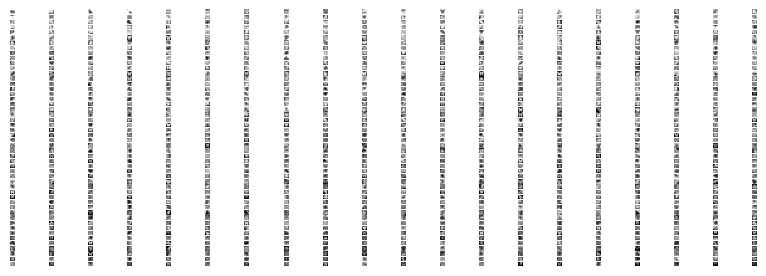

In [ ]:
X_lowest = X_train.values[:1000][sorted_ixs[:k]]
plt.figure(figsize=(10, 4))
for index, img in enumerate(X_lowest):
    plt.subplot(k // 25, 20, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [ ]:
y_lowest = y_train.values[:1000][sorted_ixs[:k]]
y_lowest

array([48, 64, 95, 53,  0, 54, 21, 53, 33, 99,  0, 96, 83, 49, 60, 54, 55,
        6, 96, 94, 72, 36, 92,  0, 92, 91, 75, 80,  6, 37, 69, 11, 86, 37,
       43, 86, 15, 89, 58, 45,  5,  9, 14, 69, 54, 89,  5, 90, 82, 77, 45,
       70, 87, 44, 35, 42, 89,  1, 40, 66, 53, 50, 31, 95, 24, 38, 36, 15,
       31, 65, 78, 28, 39, 67, 38, 89, 41, 62, 19, 96,  0, 92, 81, 91, 11,
       65, 64, 80, 53, 96,  8, 43, 64, 79, 35, 37, 53, 14, 55, 28, 79,  2,
       99, 19, 29, 28, 51, 44, 83, 77, 95, 19, 19, 34, 51, 27, 70, 20, 81,
       48, 82, 88, 72, 98, 68, 22, 52, 33,  8, 94, 94, 85, 82, 71, 58,  1,
       65, 61, 22, 84, 95, 61, 68, 56, 51, 75, 20, 37, 48, 26, 82, 78, 23,
       27, 78, 77, 25, 31, 21, 71,  5, 40, 77,  8, 71, 53, 64, 71, 16, 74,
       15, 90, 58, 11,  5, 12, 54, 23, 21, 56, 74, 23, 19, 31, 34, 70, 68,
       67, 18, 89, 32, 95, 53, 47, 96, 45, 68, 60, 70, 44, 26, 41, 31, 77,
       25, 65, 46, 96, 84, 25, 13, 59, 56, 43, 26, 72, 11, 52,  9, 33, 44,
       78, 29, 37,  0,  4

In [ ]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 7.4 s, sys: 2.49 s, total: 9.89 s
Wall time: 5.55 s


0.007939658594680429

Podemos repetir el proceso tantas veces como haga falta hasta llegar a las prestaciones requeridas.

## Otras técnicas de aprendizaje no supervisado

Otras técnicas muy usadas de aprendizaje no supervisado son

### DBSCAN

Este algoritmo define *clusters* como regiones continuas de alta densidad, agrupando progresivamente muestras cercanas entre ellas.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
np.unique(dbscan2.labels_)

array([0, 1])

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

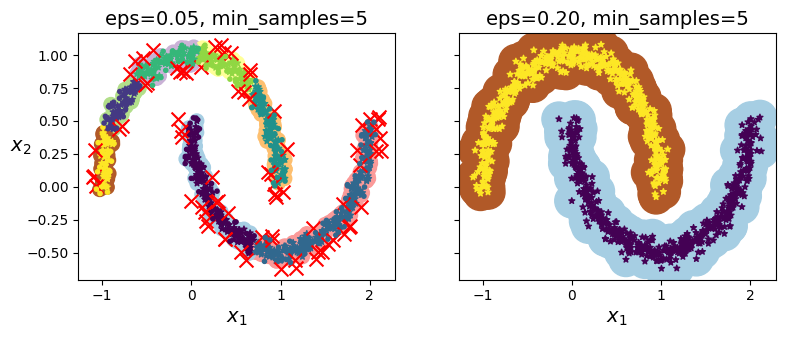

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Podemos considerar las muestras fuera de los grupos como anomalías, o bien usar un clasificador de vecinos cercanos para clasificar nuevas muestras.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

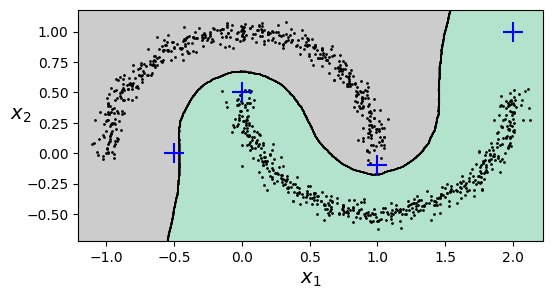

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

### Gaussian Mixtures

Los modelos de *Gaussian Mixtures* son modelos probabilísticos que asumen que las muestras del conjunto de datos provienen de la mezcla de distribuciones Gaussianas cuyos parámetros son desconocidos.

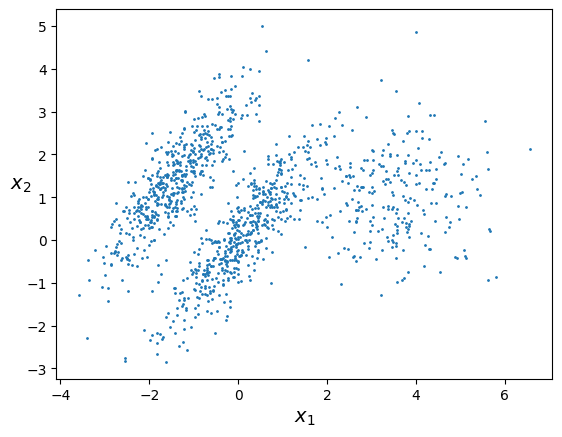

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
plot_clusters(X)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

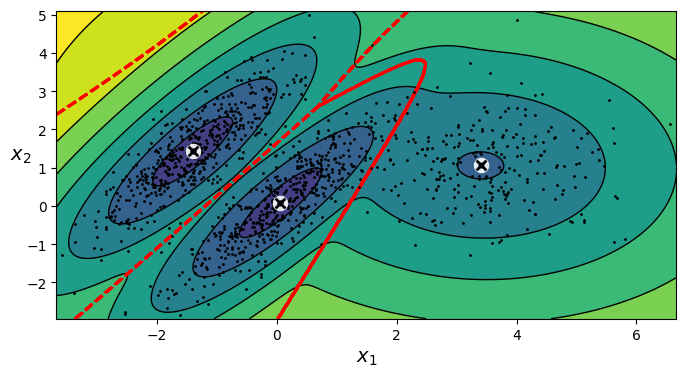

In [ ]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

In [ ]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [ ]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [ ]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [ ]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

Estos modelos son generativos, por lo que permiten crear nuevas muestras.

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [ ]:
y_new

array([0, 0, 1, 2, 2, 2])

Definiendo un valor límite podemos detectar anomalías en los datos.

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

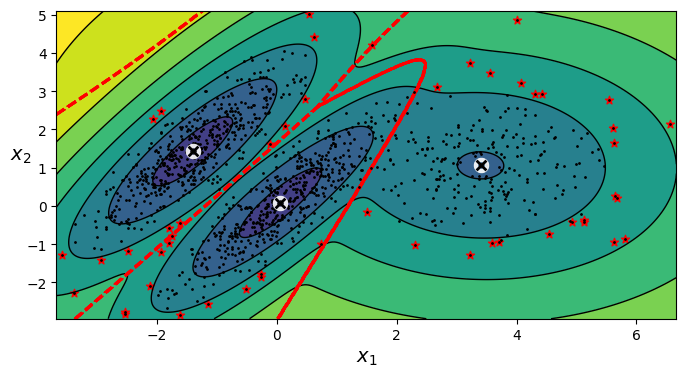

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

Una alternativa muy usada para seleccionar el número de grupos óptimos es el uso de *Bayesian Gaussian Mixtures*, ya que pueden asignar pesos cercanos a 0 a grupos innecesarios.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [ ]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

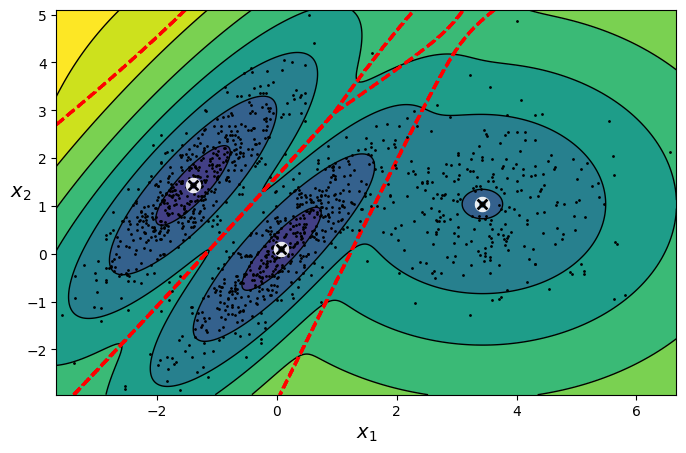

In [ ]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

## Resumen

En este post hemos introducido el concepto del aprendizaje no supervisado, modelos de *Machine Learning* que podemos usar cuando nuestros datos no están etiquetados. Hemos visto el algoritmo de *K-Means* y aplicado su uso en aprendizaje semi-supervisado y *active learning*. Por último, hemos introducido otros métodos útiles para detección de anomalías como *DBSCAN* o *Gaussian Mixtures*.